## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## loading data

In [2]:
df = pd.read_csv("D:\da\house_price.csv")
df.head(10)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,167611
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,186945
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,154628
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,133099
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,158481
5,399,377,6,5,1,1,1,1,4.5,1,7,0,6.4,323935
6,337,334,5,3,1,0,1,1,0.2,1,14,0,2.1,285076
7,110,94,1,2,0,0,0,0,5.7,1,1,0,4.5,84138
8,170,159,3,4,1,0,1,0,3.4,0,22,0,3.5,128057
9,128,116,1,2,0,0,1,0,0.8,0,1,0,5.4,113370


In [3]:
df.shape

(4954, 14)

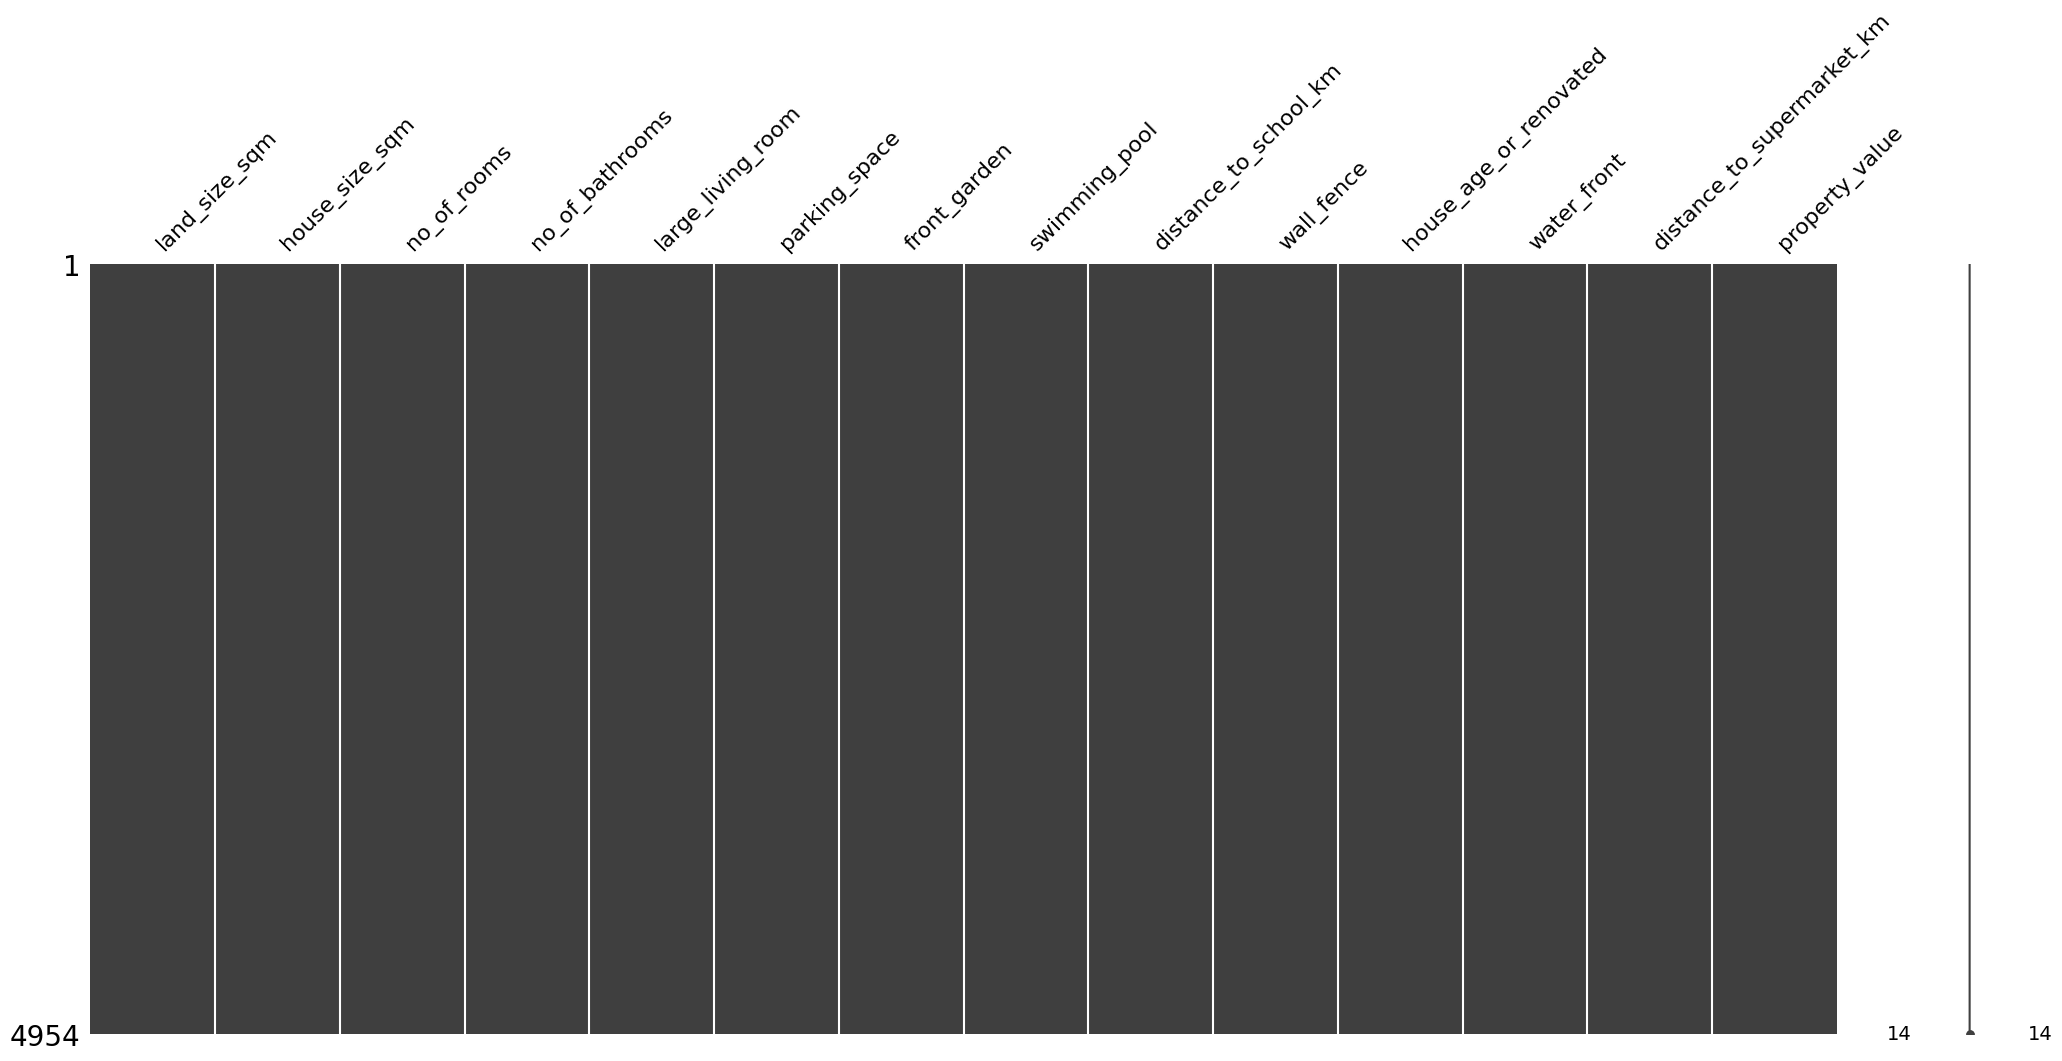

In [4]:
msno.matrix(df)
plt.show()

In [5]:
X = df.iloc[:,:-1]
X
# X.shape

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_or_renovated,water_front,distance_to_supermarket_km
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,1,1,1,1,2.9,1,20,0,4.1
4950,302,282,4,2,1,1,1,1,3.8,1,12,1,4.8
4951,153,147,3,4,1,1,0,0,3.3,1,7,0,4.7
4952,180,158,2,1,0,1,0,1,2.2,0,1,0,3.4


In [6]:
y = df.iloc[:,-1]
y
# y.shape

0       167611
1       186945
2       154628
3       133099
4       158481
         ...  
4949    254547
4950    299788
4951    138088
4952    151907
4953    566249
Name: property_value, Length: 4954, dtype: int64

In [7]:
X.isna().sum()

land_size_sqm                 0
house_size_sqm                0
no_of_rooms                   0
no_of_bathrooms               0
large_living_room             0
parking_space                 0
front_garden                  0
swimming_pool                 0
distance_to_school_km         0
wall_fence                    0
house_age_or_renovated        0
water_front                   0
distance_to_supermarket_km    0
dtype: int64

## Normalization

In [8]:
nd = MinMaxScaler()
nd.fit_transform(df)
print(nd)

MinMaxScaler()


In [9]:
df["property_value"].value_counts()

property_value
241905    2
188784    2
243912    2
103729    2
151907    2
         ..
237956    1
178875    1
158748    1
105432    1
566249    1
Name: count, Length: 4921, dtype: int64

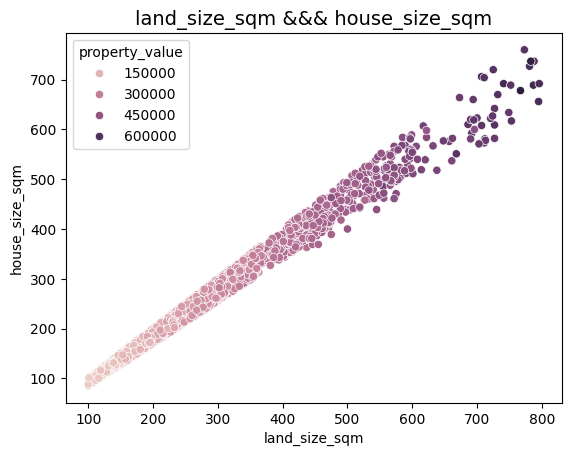

In [10]:
sns.scatterplot(x="land_size_sqm" , y="house_size_sqm",data=df , hue=df["property_value"] ,color=df["distance_to_school_km"] )
plt.title("land_size_sqm &&& house_size_sqm" , fontsize=14)
plt.show()

## cleaning datasets

In [11]:
simple = SimpleImputer(missing_values=np.nan , strategy="mean")
simple.fit_transform(df)

array([[2.01000e+02, 1.77000e+02, 3.00000e+00, ..., 0.00000e+00,
        6.80000e+00, 1.67611e+05],
       [1.96000e+02, 1.82000e+02, 4.00000e+00, ..., 0.00000e+00,
        4.10000e+00, 1.86945e+05],
       [1.98000e+02, 1.82000e+02, 4.00000e+00, ..., 0.00000e+00,
        2.10000e+00, 1.54628e+05],
       ...,
       [1.53000e+02, 1.47000e+02, 3.00000e+00, ..., 0.00000e+00,
        4.70000e+00, 1.38088e+05],
       [1.80000e+02, 1.58000e+02, 2.00000e+00, ..., 0.00000e+00,
        3.40000e+00, 1.51907e+05],
       [6.95000e+02, 6.19000e+02, 8.00000e+00, ..., 0.00000e+00,
        4.00000e-01, 5.66249e+05]])

In [12]:
X.shape

(4954, 13)

In [13]:
pca = PCA(n_components=1)
p = pca.fit_transform(X)
p

array([[ -72.89428251],
       [ -73.17524395],
       [ -71.69236706],
       ...,
       [-128.52475481],
       [-101.22556364],
       [ 589.9646539 ]])

## splitting

In [14]:
X_train,X_test,y_train,y_test = train_test_split(p,y , test_size=0.33 , random_state=44 , shuffle=True)

# print("X_train = ",X_train[:5])
# print("X_train shape = ",X_train.shape)
# print("y_train = ",y_train[:5])
# print("y_train shape = ",y_train.shape)
# print("X_test = ",X_test[:5])
# print("X_test shape = ",X_test.shape)
# print("y_test = ",y_test[:5])
# print("y_test shape = ",y_test.shape)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   large_living_room           4954 non-null   int64  
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   int64  
 8   distance_to_school_km       4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age_or_renovated      4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  property_value              4954 

In [16]:
# automl = AutoML()
# automl.fit(X_train, y_train ,task="multiclass", time_budget=500 , n_jobs=-1)

# print(f"The Accuracy Score is {automl.score(X_train , y_train)}")
# print(f"The Accuracy Score is {automl.score(X_test , y_test)}")

## this model LinearRegression

In [17]:
linear = LinearRegression()
linear.fit(X_train,y_train)

print("score LinearRegression teain :",linear.score(X_train,y_train))
print("score LinearRegression test :",linear.score(X_test,y_test))

score LinearRegression teain : 0.955935612523288
score LinearRegression test : 0.957199114709617


## this model Ridge

In [18]:
ridge = Ridge()
ridge.fit(X_train,y_train)

print("score LinearRegression teain :",ridge.score(X_train,y_train))
print("score LinearRegression test :",ridge.score(X_test,y_test))

score LinearRegression teain : 0.9559356125232877
score LinearRegression test : 0.9571991151972565


## this model RandomForestRegressor

In [42]:
rfr = RandomForestRegressor(n_estimators=200 ,criterion="poisson",max_depth=200,min_samples_split=10,min_samples_leaf=20)
rfr.fit(X_train,y_train)

print("score RandomForestRegressor teain :",rfr.score(X_train,y_train))
print("score RandomForestRegressor test :",rfr.score(X_test,y_test))

score RandomForestRegressor teain : 0.9608001619386624
score RandomForestRegressor test : 0.9566994036192779


## this model DecisionTreeRegressor

In [20]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

print("score DecisionTreeRegressor teain :",dtr.score(X_train,y_train))
print("score DecisionTreeRegressor test :",dtr.score(X_test,y_test))

score DecisionTreeRegressor teain : 1.0
score DecisionTreeRegressor test : 0.9196905719369348


## this model SVR

In [21]:
svr = SVR(kernel="linear" ,gamma="scale",C=200)
svr.fit(X_train,y_train)

print("score SVR teain :",svr.score(X_train,y_train))
print("score SVR test :",svr.score(X_test,y_test))

score SVR teain : 0.95568915907096
score SVR test : 0.9565180643886678


In [22]:
y_pred = svr.predict(X_test)
print("the values predfict is\n",y_pred[:10])

the values predfict is
 [181432.43173671 236803.92707823 111234.46243636 459375.167934
 275074.78782732 398492.51650961 218493.06595396 205499.94140433
 123598.06544786 244046.4837841 ]


In [23]:
y_test[:10]

204     149334
2284    240184
1611     99792
483     446303
3052    272935
4330    386876
1721    211821
2334    222781
3583    105907
3366    288638
Name: property_value, dtype: int64

In [24]:
mean = mean_absolute_error(y_pred,y_test , multioutput="uniform_average")
print("the value mean_absolute_error is :",mean)

the value mean_absolute_error is : 14272.329819105193


In [25]:
mean = mean_squared_error(y_pred,y_test , multioutput="uniform_average")
print("the value mean_squared_error is :",mean)

the value mean_squared_error is : 334351305.33774453


In [26]:
mean = median_absolute_error(y_pred,y_test , multioutput="uniform_average")
print("the value median_absolute_error is :",mean)

the value median_absolute_error is : 11758.434385836852


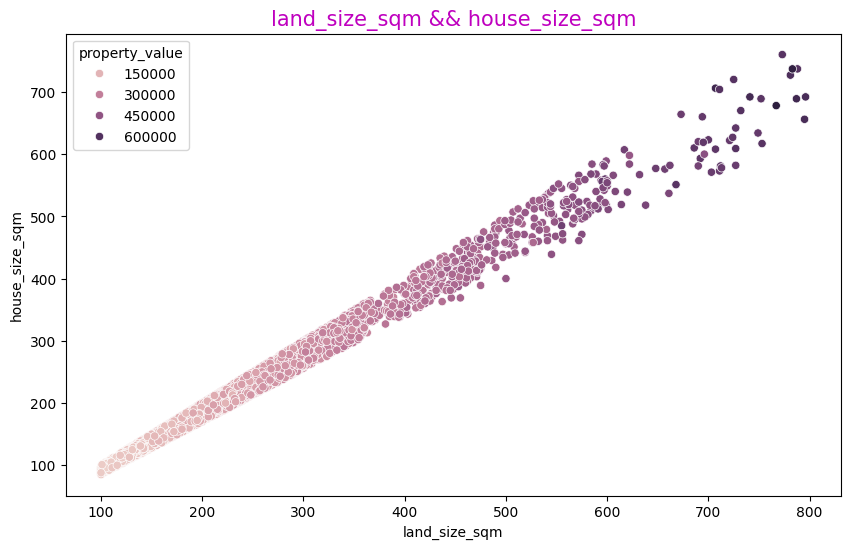

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df , x="land_size_sqm" , y="house_size_sqm" , hue="property_value" , color="r")
plt.title("land_size_sqm && house_size_sqm" , fontsize=15 , color="m")
plt.show()

In [28]:
# plt.scatter(X,y)
# plt.plot(X,y,color="red")
# plt.show()

In [29]:
X.shape, y.shape

((4954, 13), (4954,))

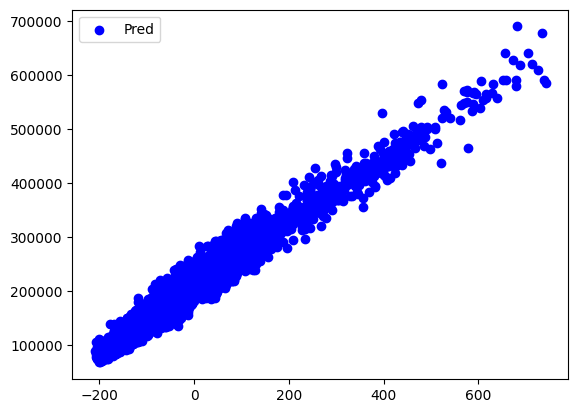

In [30]:
plt.scatter(p, y, label = "Pred", c= "b")
plt.legend()
plt.show()

## Best Fit Line

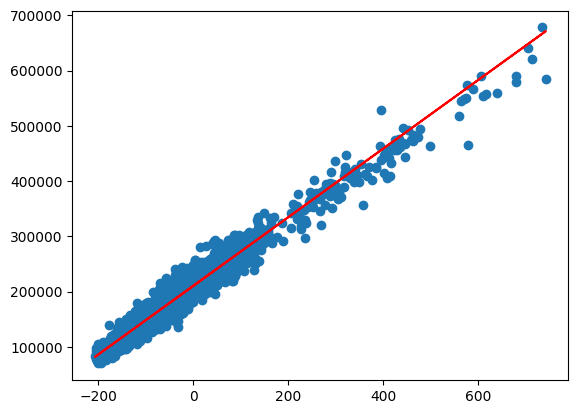

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, svr.predict(X_test), color='red')
plt.show()

## conclusion